###### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import warnings 
warnings.filterwarnings('ignore')

### Step - 1: Load the data

In [2]:
data=pd.read_csv("churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(data.info(),data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data["Churn"].value_counts()*100/len(data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Count of Churn per category')

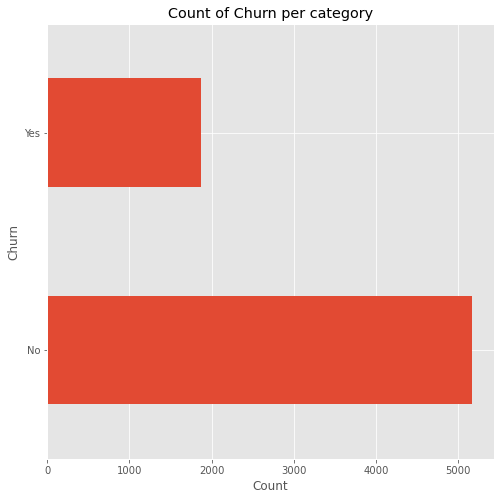

In [10]:
data["Churn"].value_counts().plot(kind='barh',figsize=(8,8))
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn per category")

In [11]:
df=data
# data[TotalCharges]=data[TotalCharges].astype("int64")
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')

In [12]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
data.loc[data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
data.dropna(how='any',inplace=True)

In [15]:
data.drop("customerID",axis=1,inplace=True)

In [16]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
## Data Exploration

In [18]:
# Univariate Analysis

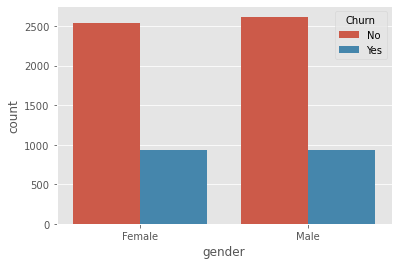

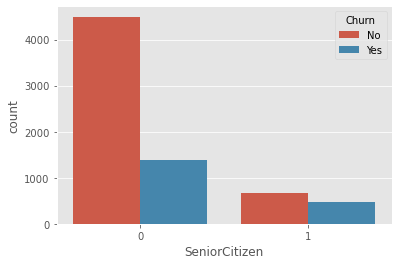

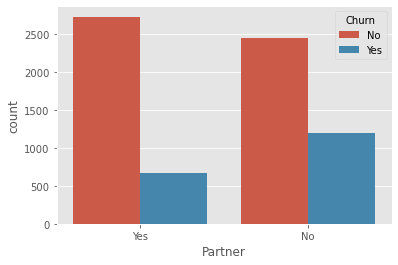

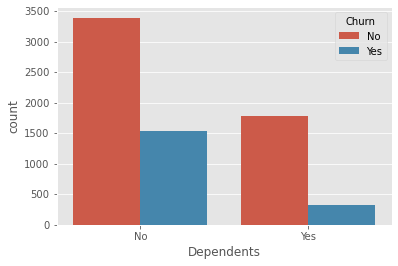

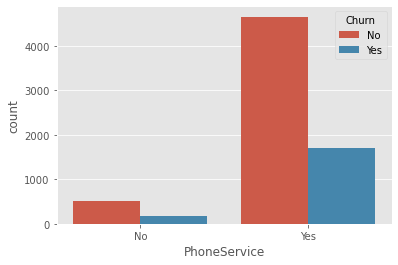

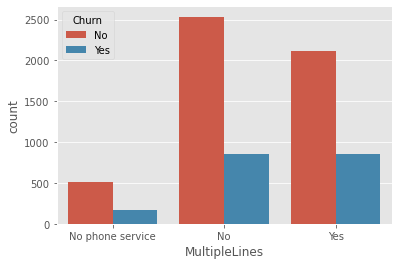

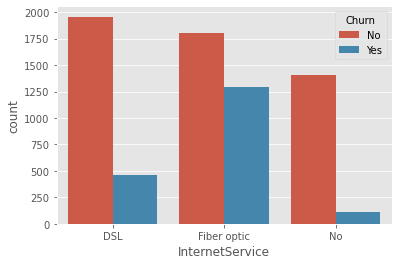

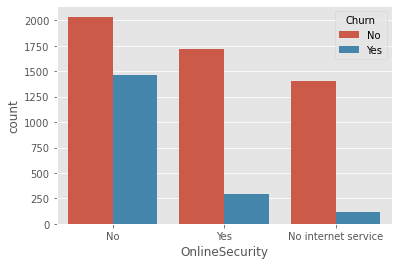

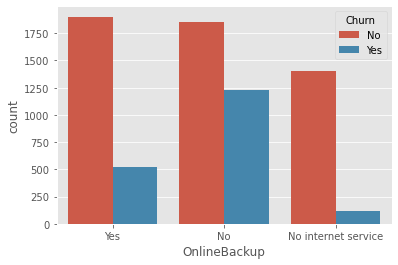

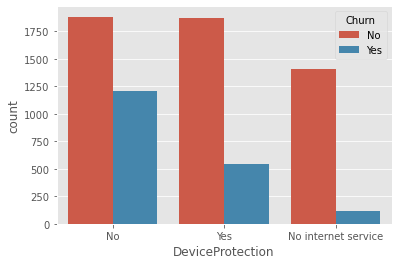

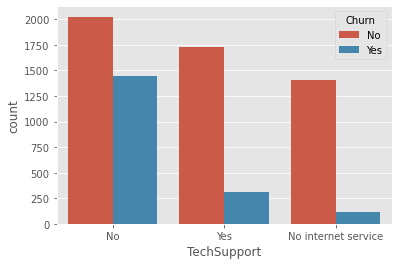

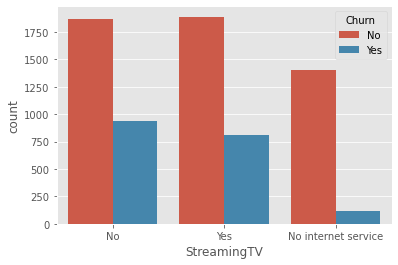

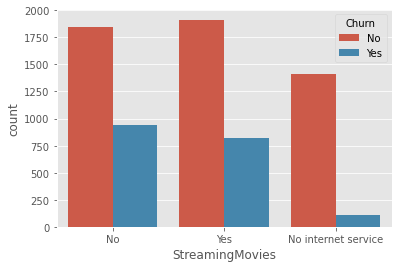

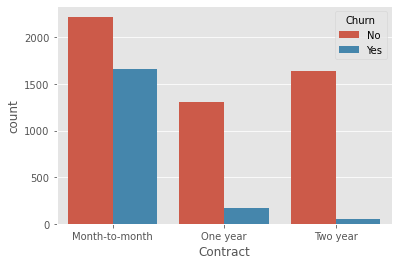

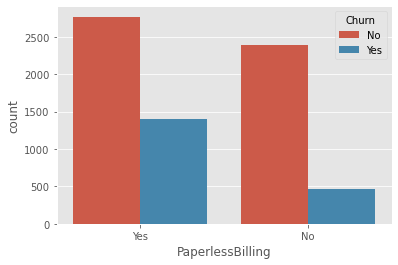

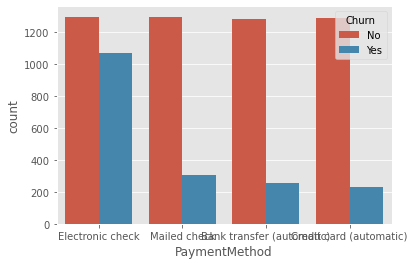

In [19]:
for i in data.drop(columns=['tenure','MonthlyCharges','TotalCharges','Churn']):
    sns.countplot(data=data,x=i,hue="Churn")
    plt.show()

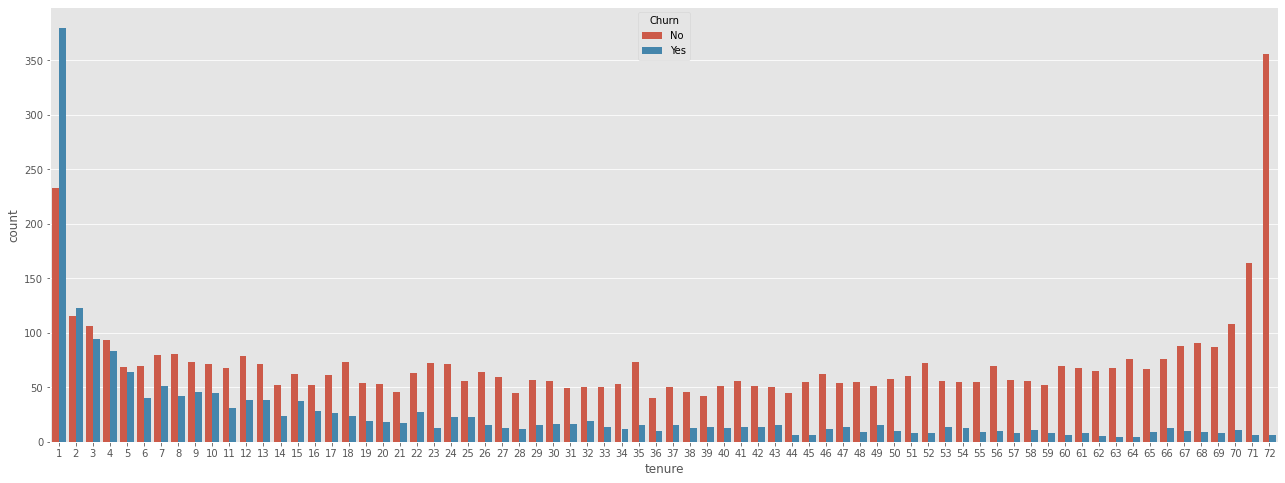

In [20]:
plt.figure(figsize= (22,8))
sns.countplot(data=data,x="tenure",hue="Churn")
plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

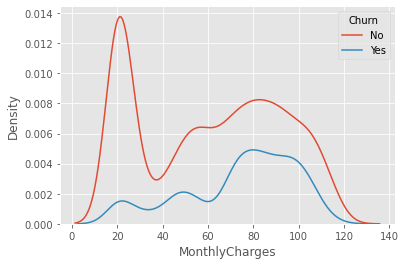

In [21]:
sns.kdeplot(x='MonthlyCharges',hue='Churn',data=data)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

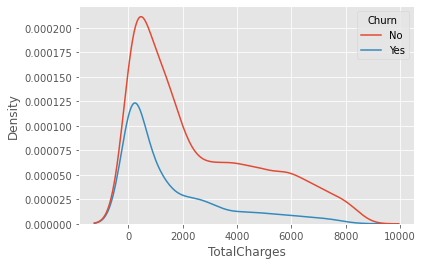

In [22]:
sns.kdeplot(x='TotalCharges',hue='Churn',data=data)

#### Conculsion
##### High Monthly charge at lower tenure results into lower Total Charge. 
##### Higher Montly Charge, Lower tenure , Lower Total Charge gives us High Churn

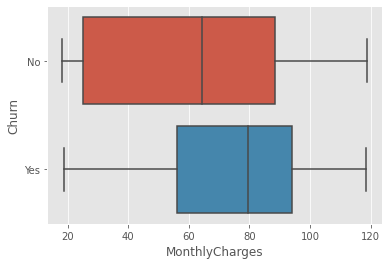

In [23]:
sns.boxplot(x='MonthlyCharges',y='Churn',data=data)
plt.show()

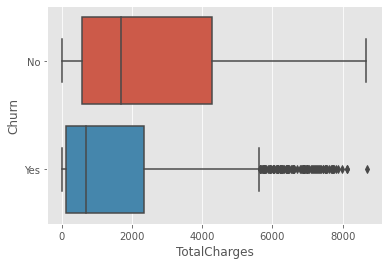

In [24]:
sns.boxplot(x='TotalCharges',y='Churn',data=data)
plt.show()

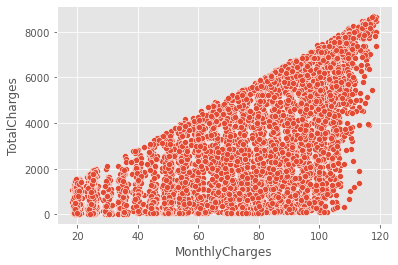

In [25]:
sns.scatterplot(x="MonthlyCharges",y="TotalCharges",data=data)
plt.show()

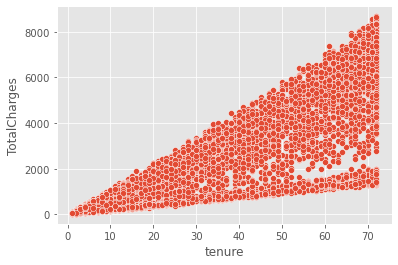

In [26]:
sns.scatterplot(x="tenure",y="TotalCharges",data=data)
plt.show()

<AxesSubplot:>

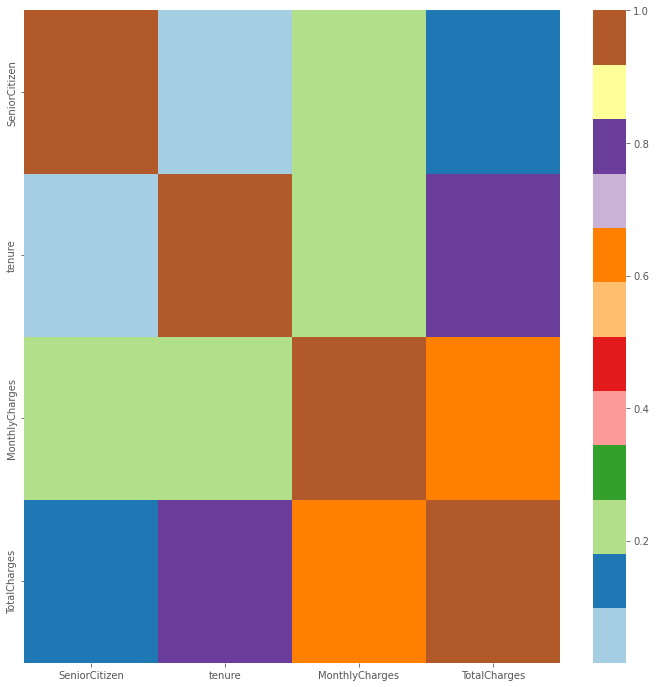

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),cmap='Paired')

In [28]:
#Bivariate analysis

In [29]:
df1=data.loc[data['Churn']=="Yes"]
df2=data.loc[data['Churn']=='No']

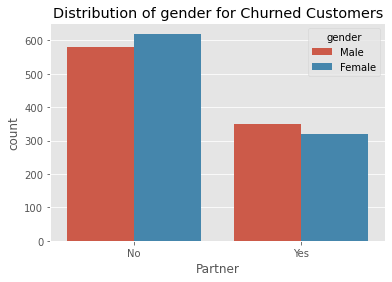

In [30]:
sns.countplot(data=df1,x="Partner",hue="gender")
plt.title("Distribution of gender for Churned Customers")
plt.show()

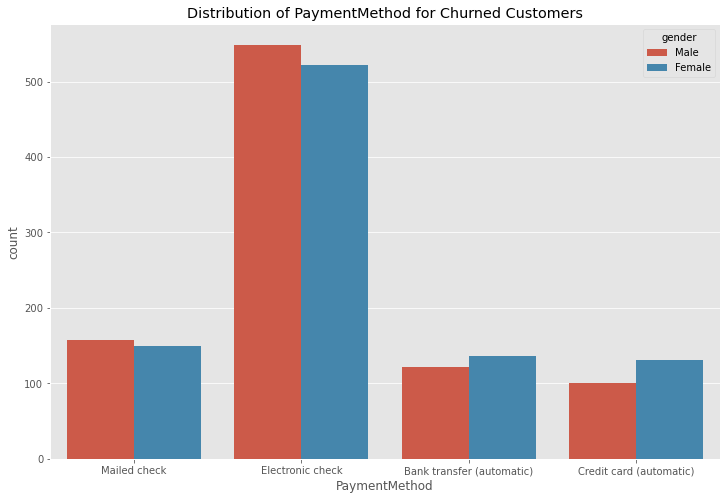

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(data=df1,x="PaymentMethod",hue="gender")
plt.title("Distribution of PaymentMethod for Churned Customers")
plt.show()

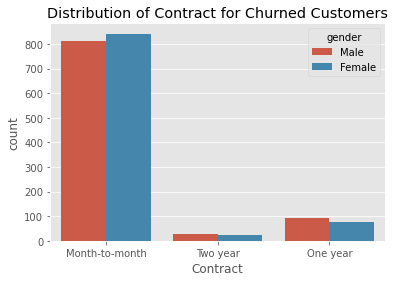

In [32]:
sns.countplot(data=df1,x="Contract",hue="gender")
plt.title("Distribution of Contract for Churned Customers")
plt.show()

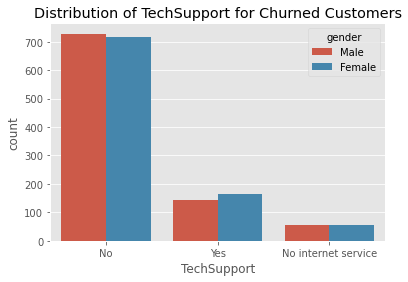

In [33]:
sns.countplot(data=df1,x="TechSupport",hue="gender")
plt.title("Distribution of TechSupport for Churned Customers")
plt.show()

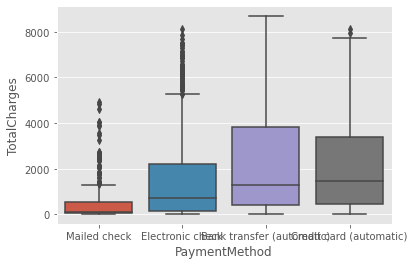

In [34]:
sns.boxplot(x="PaymentMethod",y='TotalCharges',data=df1)
plt.show()

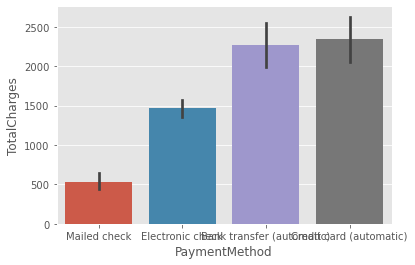

In [35]:
sns.barplot(x="PaymentMethod",y='TotalCharges',data=df1)
plt.show()

#### Conclusion
#### These are some of the quick insights from the data:
##### **1.**Electronic check medium are the highest churners
##### **2.**Contrct Type-Monthly customers are more likely to churn because of no contract terms as they are free to go customers.
##### **3.**No Online Security .No Tech Support category are High churners
##### **4.**Non senior Citizens are high churners

### Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
	- For regression task - Mean Absolute Error
	- For classification task - Accuracy


In [36]:
X=data.drop('Churn',axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [37]:
Y=data['Churn']

In [38]:
Y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
for i in X.columns:
    X[i] = le.fit_transform(X[i])
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(X[['tenure','MonthlyCharges','TotalCharges']])

In [40]:
# MachineLearning Task Is Classification(Binary)

In [41]:
# Classification Evaluation matrix

### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state = 25)

### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [43]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [44]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1883,0,1,1,0,0.105047,1,2,1,2,2,0,2,2,0,0,1,0,1.268766,0.832905
1650,0,0,0,0,-1.280248,1,2,1,0,0,0,0,0,2,0,0,3,0.683072,-1.371847
2083,0,0,0,0,-1.280248,1,0,2,1,1,1,1,1,1,0,1,3,-1.362673,-1.583417
6990,1,0,1,0,0.145791,1,0,1,2,0,0,0,2,2,0,1,2,0.994745,0.752086
19,0,0,0,0,-0.465369,1,0,1,0,2,2,0,0,2,0,1,2,0.856689,0.254820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,1,1,0,0,-0.832064,1,0,1,0,2,2,2,0,0,0,1,3,0.599402,-0.303188
2196,0,0,1,1,-0.546857,1,0,2,1,1,1,1,1,1,0,0,3,-1.360581,-0.907012
6627,0,0,1,0,1.082902,1,0,2,1,1,1,1,1,1,1,0,3,-1.354306,-0.120446
318,1,1,1,0,-0.343137,1,0,1,0,0,2,0,2,2,0,1,2,0.975919,0.398955


In [45]:
x_train.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1457
TotalCharges        4969
dtype: int64

In [46]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [47]:
for i in x_train.columns:
    x_train[i] = le.fit_transform(x_train[i])

# x_train=pd.get_dummies(x_train)
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1883,0,1,1,0,34,1,2,1,2,2,0,2,2,0,0,1,0,1192,3600
1650,0,0,0,0,0,1,2,1,0,0,0,0,0,2,0,0,3,922,364
2083,0,0,0,0,0,1,0,2,1,1,1,1,1,1,0,1,3,32,24
6990,1,0,1,0,35,1,0,1,2,0,0,0,2,2,0,1,2,1062,3489
19,0,0,0,0,20,1,0,1,0,2,2,0,0,2,0,1,2,1002,2762


In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])

In [49]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1883,0,1,1,0,0.107049,1,2,1,2,2,0,2,2,0,0,1,0,1.290987,0.830561
1650,0,0,0,0,-1.276114,1,2,1,0,0,0,0,0,2,0,0,3,0.676838,-1.366792
2083,0,0,0,0,-1.276114,1,0,2,1,1,1,1,1,1,0,1,3,-1.347580,-1.597664
6990,1,0,1,0,0.147730,1,0,1,2,0,0,0,2,2,0,1,2,0.995286,0.755189
19,0,0,0,0,-0.462489,1,0,1,0,2,2,0,0,2,0,1,2,0.858808,0.261531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,1,1,0,0,-0.828620,1,0,1,0,2,2,2,0,0,0,1,3,0.585853,-0.297314
2196,0,0,1,1,-0.543852,1,0,2,1,1,1,1,1,1,0,0,3,-1.345306,-0.903691
6627,0,0,1,0,1.083399,1,0,2,1,1,1,1,1,1,1,0,3,-1.338482,-0.116691
318,1,1,1,0,-0.340445,1,0,1,0,0,2,0,2,2,0,1,2,0.979363,0.406165


### Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [50]:
y_test=le.fit_transform(y_test)
# y_test=np.where(y_train=="Yes",1,0)
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [51]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6366,0,0,1,0,1.286622,1,0,0,0,2,2,2,0,2,2,1,3,-0.007210,1.023884
4007,1,0,1,0,0.919926,1,2,2,1,1,1,1,1,1,2,0,0,-1.207883,0.021630
6252,1,0,1,1,0.716206,0,1,0,2,0,0,0,2,0,0,1,1,-0.942229,0.323799
173,0,0,1,0,0.838438,1,0,1,0,0,2,0,2,2,1,1,0,1.047039,1.184492
523,0,0,0,0,-0.383881,1,2,1,0,0,0,0,0,0,0,0,0,0.281454,0.195622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,0,0,-0.954296,1,2,1,0,0,0,0,0,2,0,1,2,0.651696,-0.541011
3977,1,0,1,0,1.245878,1,0,1,2,2,2,2,2,2,2,1,1,1.645284,1.545859
7018,1,0,1,1,-1.280248,1,0,1,0,0,0,0,0,0,0,1,3,0.091103,-1.437223
5803,1,0,1,0,-1.117272,1,2,1,0,2,0,0,0,0,0,1,2,0.505272,-0.866345


In [52]:
for i in x_test.columns:
    x_test[i]=le.fit_transform(x_test[i])
# x_test=pd.get_dummies(x_test)

In [53]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6366,0,0,1,0,63,1,0,0,0,2,2,2,0,2,2,1,3,379,1365
4007,1,0,1,0,54,1,2,2,1,1,1,1,1,1,2,0,0,83,845
6252,1,0,1,1,49,0,1,0,2,0,0,0,2,0,0,1,1,138,1005
173,0,0,1,0,52,1,0,1,0,0,2,0,2,2,1,1,0,709,1436
523,0,0,0,0,22,1,2,1,0,0,0,0,0,0,0,0,0,473,938


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

In [55]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6366,0,0,1,0,1.286122,1,0,0,0,2,2,2,0,2,2,1,3,-0.088933,1.049469
4007,1,0,1,0,0.917707,1,2,2,1,1,1,1,1,1,2,0,0,-1.130457,0.008425
6252,1,0,1,1,0.713032,0,1,0,2,0,0,0,2,0,0,1,1,-0.936931,0.328746
173,0,0,1,0,0.835837,1,0,1,0,0,2,0,2,2,1,1,0,1.072225,1.191612
523,0,0,0,0,-0.392212,1,2,1,0,0,0,0,0,0,0,0,0,0.241821,0.194612


### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest


#### **1.** KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred_train = knn_classifier.predict(x_train)
y_pred_test = knn_classifier.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

Training Accuracy :  0.8655669321198332
Testing Accuracy  :  0.745164960182025


In [59]:
#selecting best value
acc_train = []
acc_test  = []

for i in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(x_train, y_train)
    
    y_pred_train = knn_classifier.predict(x_train)
    y_pred_test  = knn_classifier.predict(x_test)
    
    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))

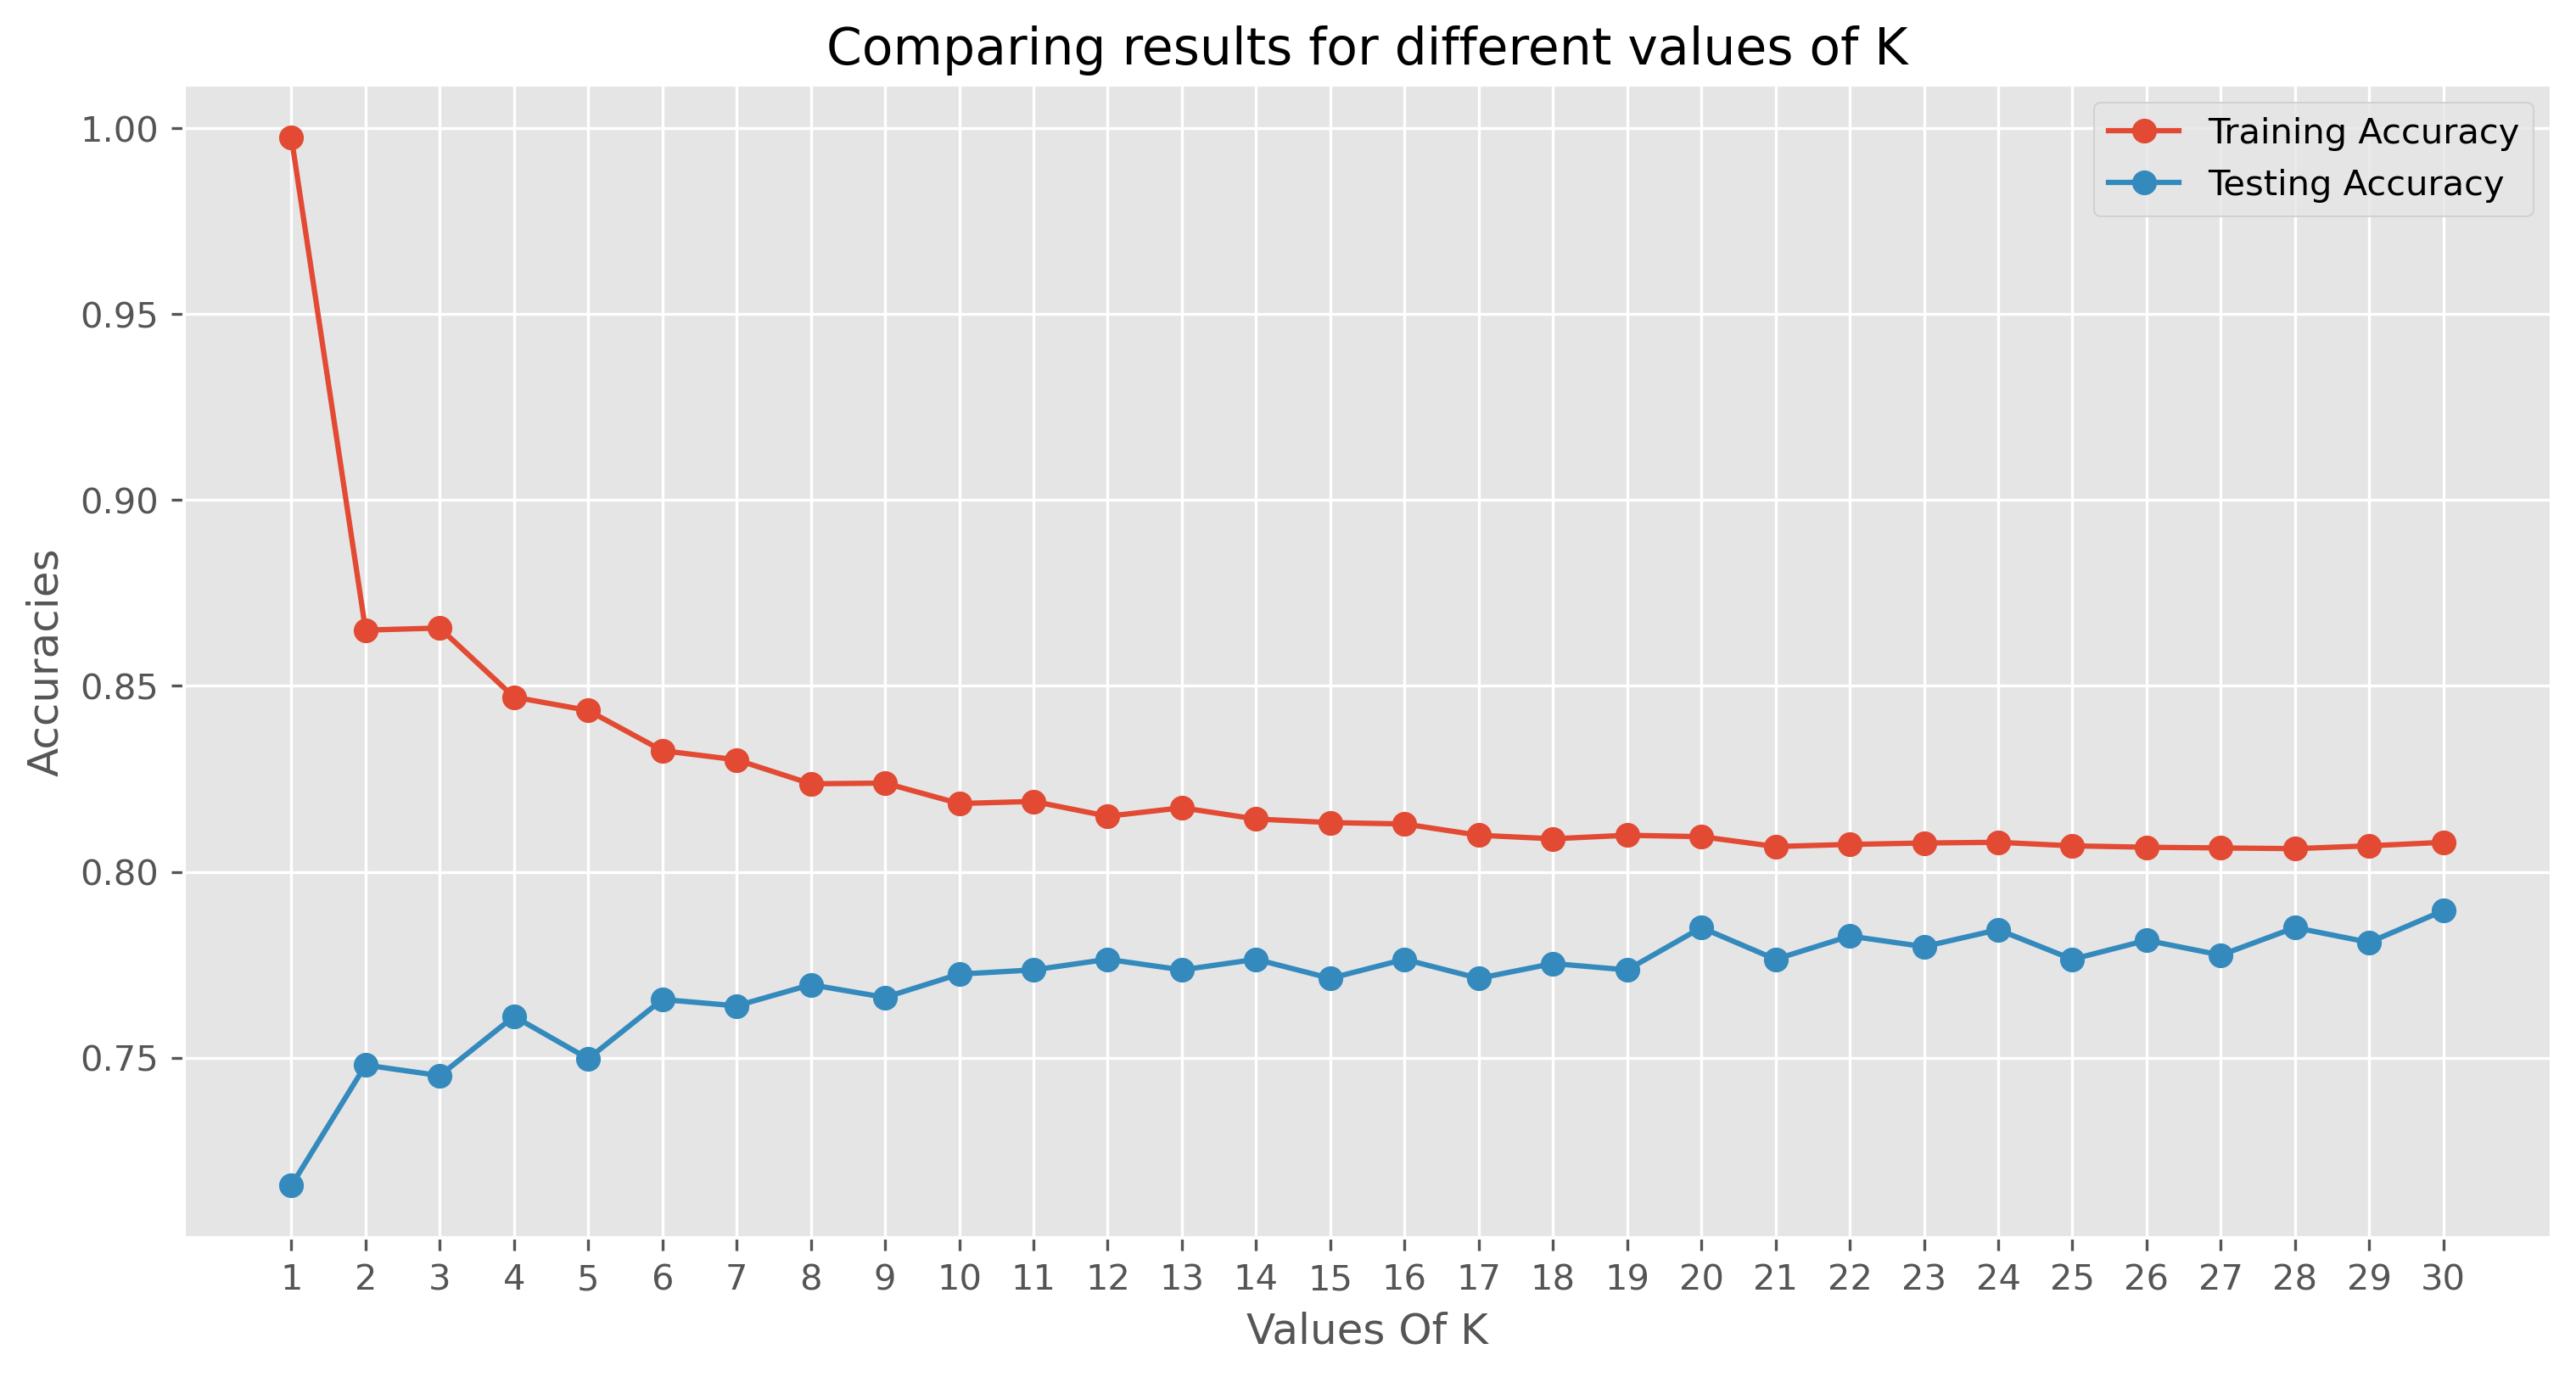

In [60]:
x = list(range(1,31))

plt.figure(figsize = (12,6), dpi = 300)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accuracy')

plt.xticks(x)
plt.xlabel('Values Of K')
plt.ylabel('Accuracies')
plt.title('Comparing results for different values of K')
plt.legend()

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 20)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [62]:
y_pred_train = knn_classifier.predict(x_train)
y_pred_test = knn_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))
test_accuracy_knn= accuracy_score(y_test, y_pred_test)

Training Accuracy :  0.8094425483503982
Testing Accuracy  :  0.7849829351535836


#### **2** Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
LR_classifier=LogisticRegression()
LR_classifier.fit(x_train,y_train)

LogisticRegression()

In [64]:
pred_train=LR_classifier.predict(x_train)
pred_test=LR_classifier.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

print("Training Accuracy :",train_accuracy)
print("Testing Accuracy :",test_accuracy)

Training Accuracy : 0.8084945013272659
Testing Accuracy : 0.7997724687144482


In [66]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


In [67]:
print("\nTraining Accuracy :",accuracy_score(y_train,pred_train))
print("Testing Accuracy :",accuracy_score(y_test,pred_test))

print("\nTraining Set F1_score :",f1_score(y_train,pred_train))
print("Testing Set F1_score :",f1_score(y_test,pred_test))

print("\nPrecision :",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))


Training Accuracy : 0.8084945013272659
Testing Accuracy : 0.7997724687144482

Training Set F1_score : 0.6026750590086546
Testing Set F1_score : 0.5621890547263682

Precision : 0.6457142857142857
Recall: 0.4977973568281938


In [68]:
from imblearn.over_sampling import SMOTE
smote_sampler=SMOTE()
x_sampled,y_sampled=smote_sampler.fit_resample(X,Y)

print(x_sampled.shape)
print(y_sampled.shape)

(10326, 19)
(10326,)


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=5)
print("Train data shape :",x_train.shape)
print("Train labels shape :",y_train.shape)
print("Test data shape :",x_test.shape)
print("Test labels shape :",y_test.shape)

Train data shape : (8260, 19)
Train labels shape : (8260,)
Test data shape : (2066, 19)
Test labels shape : (2066,)


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=5)

print("Train data shape :",x_train.shape)
print("Train labels shape :",y_train.shape)
print("Test data shape :",x_test.shape)
print("Test labels shape :",y_test.shape)

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

pred_train=classifier.predict(x_train)
pred_test=classifier.predict(x_test)

print("\nTraining Accuracy :",accuracy_score(y_train,pred_train))
print("Testing Accuracy :",accuracy_score(y_test,pred_test))

print("\nTraining Set F1_score :",f1_score(y_train,pred_train))
print("Testing Set F1_score :",f1_score(y_test,pred_test))

print("\nPrecision :",precision_score(y_test,pred_test))
print("Recall:",recall_score(y_test,pred_test))

test_accuracy_LR=accuracy_score(y_test,pred_test)

Train data shape : (8260, 19)
Train labels shape : (8260,)
Test data shape : (2066, 19)
Test labels shape : (2066,)

Training Accuracy : 0.789588377723971
Testing Accuracy : 0.7657308809293321

Training Set F1_score : 0.795288574793875
Testing Set F1_score : 0.7744641192917054

Precision : 0.7520361990950226
Recall: 0.7982708933717579


#### **3** Support Vector Machine

In [103]:
from sklearn.svm import SVC
svm_classifier =SVC(C=4,degree=3,random_state=2, kernel='rbf')
svm_classifier.fit(x_train,y_train)

SVC(C=4, random_state=2)

In [104]:
pred_train=svm_classifier.predict(x_train)
pred_test=svm_classifier.predict(x_test)

print("Training Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("\nTraining Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("\nPrecison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

test_accuracy_svm=accuracy_score(y_test,pred_test)

Training Accuracy :  0.8451573849878935
Testing Accuracy :  0.7942884801548886

Training Set f1_score :  0.8513309310705567
Testing Set f1_score :  0.8058474189127455

Precison :  0.7682926829268293
Recall :  0.8472622478386167


#### **4** Decision Trees

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier(random_state=2)

In [74]:
search_params= {
    'max_depth': [5,10,15,20,25,30],
    'criterion': ['entropy','gini'],
    'min_impurity_decrease': [0.05,0.01,0.005,0.0001]
}

In [75]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [76]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search=RandomizedSearchCV(
                                    estimator=dt_classifier,
                                    param_distributions=search_params,
                                    n_iter=10,
                                    scoring=['f1'],
                                    refit='f1',
                                    cv=5,
                                    verbose=-1
                                    )

In [77]:
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_impurity_decrease': [0.05, 0.01,
                                                                  0.005,
                                                                  0.0001]},
                   refit='f1', scoring=['f1'], verbose=-1)

In [78]:
print("Best Score :",randomized_search.best_score_)
print("Best Params :",randomized_search.best_params_)

best_dt_model = randomized_search.best_estimator_
pred_train=best_dt_model.predict(x_train)
pred_test=best_dt_model.predict(x_test)

print("\nTraining Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("\nTraining Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("\nPrecison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

test_accuracy_dt =accuracy_score(y_test,pred_test)

Best Score : 0.7946400443599938
Best Params : {'min_impurity_decrease': 0.0001, 'max_depth': 10, 'criterion': 'entropy'}

Training Accuracy :  0.8588377723970945
Testing Accuracy :  0.7739593417231365

Training Set f1_score :  0.8680995475113122
Testing Set f1_score :  0.7934542237947811

Precison :  0.7352459016393442
Recall :  0.861671469740634


#### **5** Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(random_state=2)

In [80]:
search_params={
    'n_estimators' : [10,20,30,50,100],
    'max_features' : [15,20,25,30],
    'max_depth' : [3,5,10,15,20,25,30],
    'criterion' : ['entropy','gini'],
    'min_impurity_decrease' : [0.05,0.01,0.005,0.0001]
}

In [81]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search=RandomizedSearchCV(
                                    estimator=rf_classifier,
                                    param_distributions=search_params,
                                    n_iter=10,
                                    scoring=['f1'],
                                    refit='f1',
                                    cv=5,
                                    verbose=-1
                                    )

In [82]:
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 5, 10, 15, 20, 25, 30],
                                        'max_features': [15, 20, 25, 30],
                                        'min_impurity_decrease': [0.05, 0.01,
                                                                  0.005,
                                                                  0.0001],
                                        'n_estimators': [10, 20, 30, 50, 100]},
                   refit='f1', scoring=['f1'], verbose=-1)

In [83]:
print("Best Score :",randomized_search.best_score_)
print("Best Params :",randomized_search.best_params_)

best_rf_model = randomized_search.best_estimator_
pred_train=best_dt_model.predict(x_train)
pred_test=best_dt_model.predict(x_test)

print("\nTraining Accuracy : ",accuracy_score(y_train,pred_train))
print("Testing Accuracy : ",accuracy_score(y_test,pred_test))

print("\nTraining Set f1_score : ",f1_score(y_train,pred_train))
print("Testing Set f1_score : ",f1_score(y_test,pred_test))

print("\nPrecison : ",precision_score(y_test,pred_test))
print("Recall : ",recall_score(y_test,pred_test))

test_accuracy_rf=accuracy_score(y_test,pred_test)

Best Score : 0.8262540042780577
Best Params : {'n_estimators': 30, 'min_impurity_decrease': 0.0001, 'max_features': 15, 'max_depth': 30, 'criterion': 'entropy'}

Training Accuracy :  0.8588377723970945
Testing Accuracy :  0.7739593417231365

Training Set f1_score :  0.8680995475113122
Testing Set f1_score :  0.7934542237947811

Precison :  0.7352459016393442
Recall :  0.861671469740634


### Step - 7: Predict and evaluate each model separately using the correct evaluation metric.


In [84]:
data=[["Logistic Regression",test_accuracy_LR],
     ['Decission Tree',test_accuracy_dt],
     ['Random Forest',test_accuracy_rf],
     ['SVC',test_accuracy_svm],['KNN',test_accuracy_knn]]
model= pd.DataFrame(data,columns=["Name","Accuracy Score"])
model

,Name,Accuracy Score
0,Logistic Regression,0.765731
1,Decission Tree,0.773959
2,Random Forest,0.773959
3,SVC,0.794288
4,KNN,0.784983


### Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction.


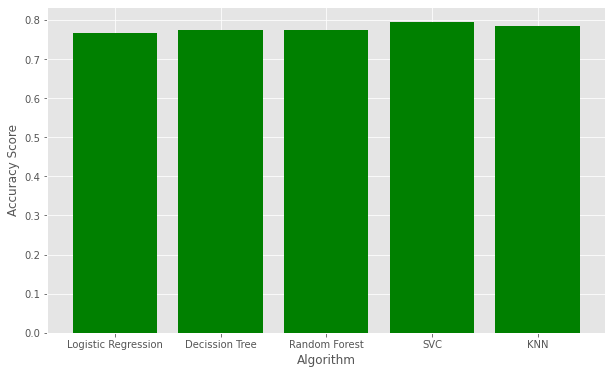

In [85]:
plt.figure(figsize=(10,6))
plt.bar(model['Name'],model['Accuracy Score'],color='g')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

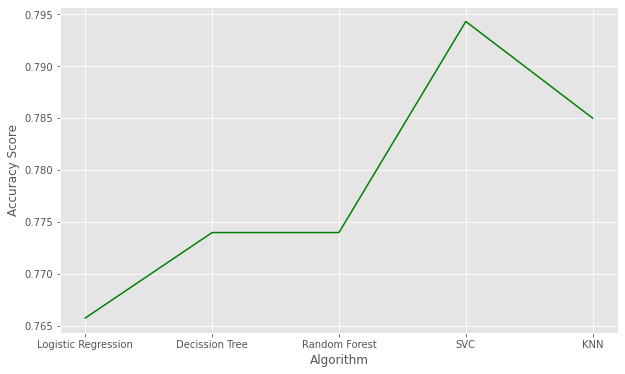

In [86]:
plt.figure(figsize=(10,6))
plt.plot(model['Name'],model['Accuracy Score'],color='g')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

### Conclusion
- The Best Algorithm for Churn Prediction is Support Vector Machine
- Accuracy of Support Vector Machine is 0.80